# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [72]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [73]:
pd.set_option("display.max_columns", None)
df

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [74]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [75]:
# round(df.isnull().sum(axis=0)*100/df.shape[0],2)
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

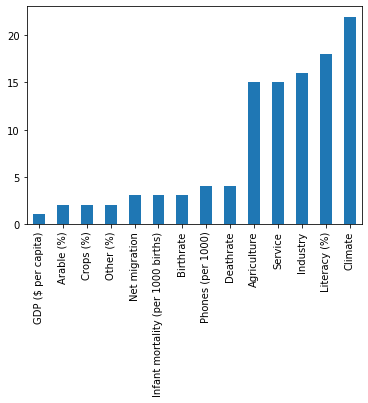

In [76]:
missing = df.isna().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar()

In [77]:
missing_val_count_by_column = (df.isnull().sum())
missing_val_count_by_column.sort_values(inplace = True)
print((missing_val_count_by_column[missing_val_count_by_column > 0]/df.shape[0])*100)

GDP ($ per capita)                    0.440529
Arable (%)                            0.881057
Crops (%)                             0.881057
Other (%)                             0.881057
Net migration                         1.321586
Infant mortality (per 1000 births)    1.321586
Birthrate                             1.321586
Phones (per 1000)                     1.762115
Deathrate                             1.762115
Agriculture                           6.607930
Service                               6.607930
Industry                              7.048458
Literacy (%)                          7.929515
Climate                               9.691630
dtype: float64


In [78]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [79]:
# df.boxplot(['Area (sq. mi.)', 'Population'], figsize=(16,10))

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- some columns have the proper data type           <br>
2- outliers          <br>
3- null values in each column          <br>
4- One Hot Encoding          <br>

In [80]:
#make a copy for the original dataset
df_copy=df.copy()

ob = df_copy[df_copy.select_dtypes(include=['object']).columns.to_list()]
ob.drop(columns=['Country', 'Region'],inplace=True)

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

## **some columns have the proper data type**

In [81]:
#solution 


print(ob.columns.to_list())

for x in ob.columns.to_list():
    df_copy[x] = df_copy[x].apply(lambda i: float(str(i).replace(',', '.')))
#     df_copy[x] = df_copy[x].replace(',','.')
    print(x)
#     df_copy[x] = df_copy[x].astype(float)
#     df_copy[x] = pd.to_numeric(df_copy[x], errors = 'coerce')
    
# print(ob.columns.to_list())
# df_copy['Pop. Density (per sq. mi.)'] = df_copy['Pop. Density (per sq. mi.)'].astype(float, errors = 'raise')


['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']
Pop. Density (per sq. mi.)
Coastline (coast/area ratio)
Net migration
Infant mortality (per 1000 births)
Literacy (%)
Phones (per 1000)
Arable (%)
Crops (%)
Other (%)
Climate
Birthrate
Deathrate
Agriculture
Industry
Service


In [82]:
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [83]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

## **Outliers**

In [84]:
quantitative = df_copy.select_dtypes(include=['float64','int64'])

qualitative = df_copy.select_dtypes(exclude=['float64','int64'])

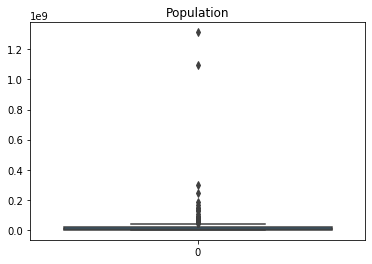

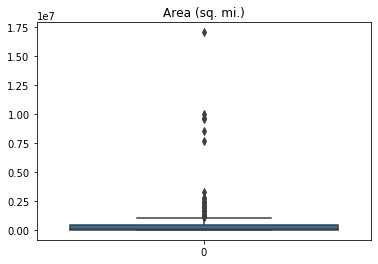

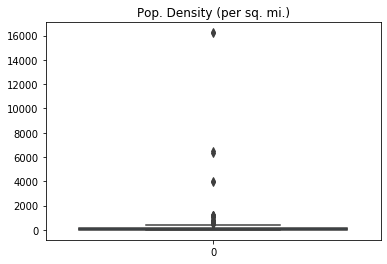

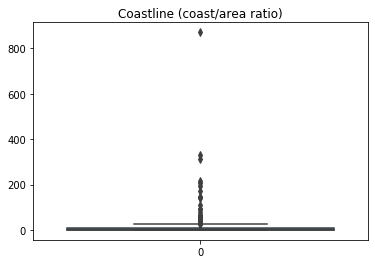

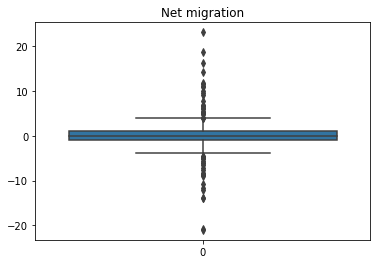

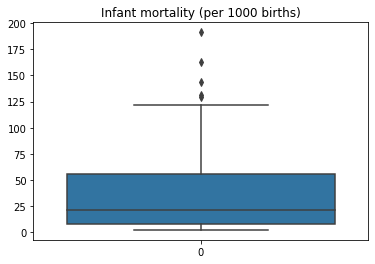

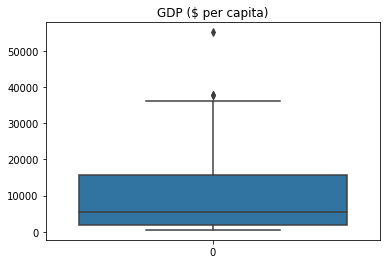

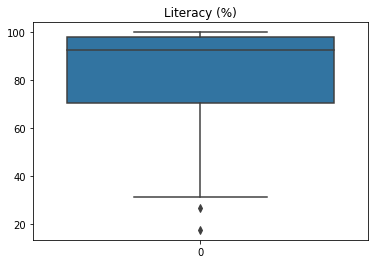

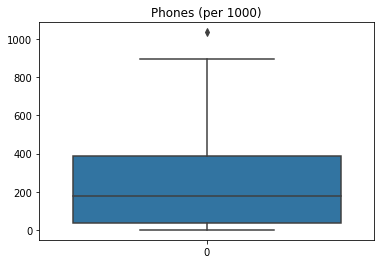

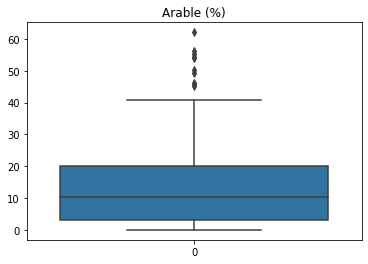

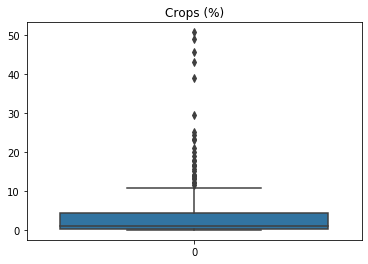

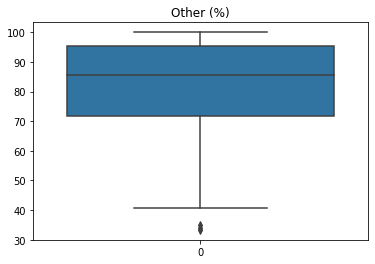

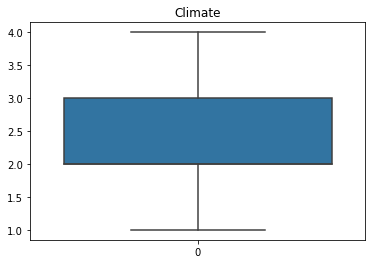

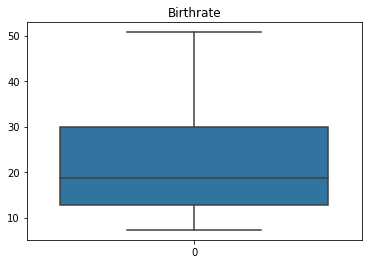

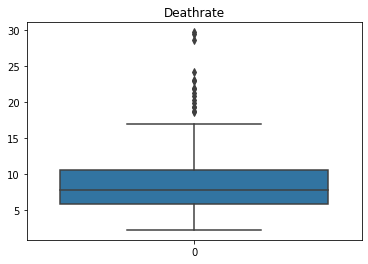

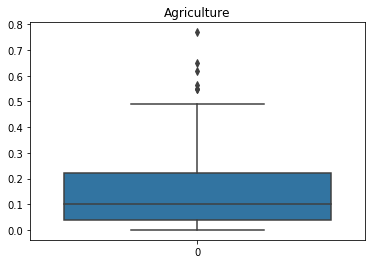

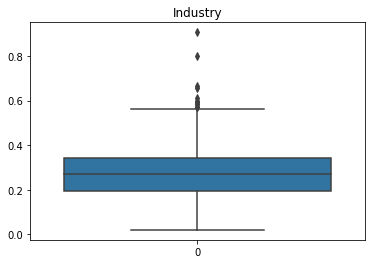

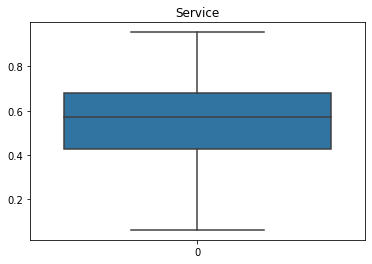

In [85]:
# Boxplots
                                                                 
for i in quantitative.columns.to_list() :
#     ax.boxplot(quantitative.ix[:,i].values, positions = [i])
    sns.boxplot(data=quantitative[i])
    plt.title(i)
    plt.show()
    
 

In [86]:
# Inter Quantile Range(IQR)
# Q1 = np.percentile(quantitative, 25, interpolation = 'midpoint')
# Q2 = np.percentile(quantitative, 50, interpolation = 'midpoint')  
# Q3 = np.percentile(quantitative, 75, interpolation = 'midpoint')

# IQR = Q3 - Q1

# low_lim = Q1 - (IQR * 3)
# up_lim = Q3 + (IQR * 3)

# outlier =[]
# for i in quantitative:
#     for x in quantitative[i]:
#         if ((x> up_lim) or (x<low_lim)):
#              outlier.append(x)
# print(' outlier in the dataset is', outlier)


# low_lim, up_lim, IQR

In [87]:
# Z-score

def remove_outliers(y):
    cut_off = 3 * y.std()
    return (y > y.mean() - cut_off) & (y < y.mean() + cut_off)


for i,x in enumerate(quantitative):
    data_without_outLiers = remove_outliers(quantitative[x])  
    quantitative[x] = quantitative[data_without_outLiers]
    
quantitative     

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,31056997.0,31056997.0,31056997.0,NaN,NaN,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0,31056997.0
1,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0,3581655.0
2,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0,32930091.0
3,57794.0,57794.0,57794.0,57794.0,NaN,57794.0,57794.0,57794.0,57794.0,57794.0,57794.0,57794.0,57794.0,57794.0,57794.0,NaN,NaN,NaN
4,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,71201.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,NaN,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0,2460492.0
223,273008.0,273008.0,273008.0,273008.0,NaN,NaN,NaN,NaN,NaN,273008.0,273008.0,273008.0,273008.0,NaN,NaN,NaN,NaN,273008.0
224,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0,21456188.0
225,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0,11502010.0


In [88]:
quantitative.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          225 non-null    float64
 1   Area (sq. mi.)                      220 non-null    float64
 2   Pop. Density (per sq. mi.)          221 non-null    float64
 3   Coastline (coast/area ratio)        222 non-null    float64
 4   Net migration                       217 non-null    float64
 5   Infant mortality (per 1000 births)  219 non-null    float64
 6   GDP ($ per capita)                  223 non-null    float64
 7   Literacy (%)                        206 non-null    float64
 8   Phones (per 1000)                   220 non-null    float64
 9   Arable (%)                          219 non-null    float64
 10  Crops (%)                           218 non-null    float64
 11  Other (%)                           223 non-n

## **Null values in each column**

In [89]:
#solution 


quantitative.fillna(df_copy.mean(), inplace=True)

In [90]:
#test 
quantitative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          227 non-null    float64
 1   Area (sq. mi.)                      227 non-null    float64
 2   Pop. Density (per sq. mi.)          227 non-null    float64
 3   Coastline (coast/area ratio)        227 non-null    float64
 4   Net migration                       227 non-null    float64
 5   Infant mortality (per 1000 births)  227 non-null    float64
 6   GDP ($ per capita)                  227 non-null    float64
 7   Literacy (%)                        227 non-null    float64
 8   Phones (per 1000)                   227 non-null    float64
 9   Arable (%)                          227 non-null    float64
 10  Crops (%)                           227 non-null    float64
 11  Other (%)                           227 non-n

In [91]:
quantitative


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997.0,31056997.0,31056997.0,31056997.0,3.812500e-02,3.550696e+01,3.105700e+07,3.105700e+07,3.105700e+07,31056997.0,31056997.0,31056997.0,31056997.0,3.105700e+07,3.105700e+07,3.105700e+07,3.105700e+07,3.105700e+07
1,3581655.0,3581655.0,3581655.0,3581655.0,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06,3581655.0,3581655.0,3581655.0,3581655.0,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06
2,32930091.0,32930091.0,32930091.0,32930091.0,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07,32930091.0,32930091.0,32930091.0,32930091.0,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07
3,57794.0,57794.0,57794.0,57794.0,3.812500e-02,5.779400e+04,5.779400e+04,5.779400e+04,5.779400e+04,57794.0,57794.0,57794.0,57794.0,5.779400e+04,5.779400e+04,1.508443e-01,2.827109e-01,5.652830e-01
4,71201.0,71201.0,71201.0,71201.0,7.120100e+04,7.120100e+04,7.120100e+04,7.120100e+04,7.120100e+04,71201.0,71201.0,71201.0,71201.0,7.120100e+04,7.120100e+04,1.508443e-01,2.827109e-01,5.652830e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2460492.0,2460492.0,2460492.0,2460492.0,2.460492e+06,2.460492e+06,2.460492e+06,8.283828e+01,2.460492e+06,2460492.0,2460492.0,2460492.0,2460492.0,2.460492e+06,2.460492e+06,2.460492e+06,2.460492e+06,2.460492e+06
223,273008.0,273008.0,273008.0,273008.0,3.812500e-02,3.550696e+01,9.689823e+03,8.283828e+01,2.360614e+02,273008.0,273008.0,273008.0,273008.0,2.211473e+01,9.241345e+00,1.508443e-01,2.827109e-01,2.730080e+05
224,21456188.0,21456188.0,21456188.0,21456188.0,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07,21456188.0,21456188.0,21456188.0,21456188.0,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07
225,11502010.0,11502010.0,11502010.0,11502010.0,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07,11502010.0,11502010.0,11502010.0,11502010.0,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07


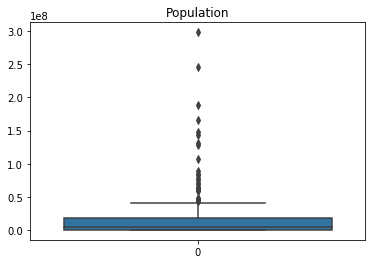

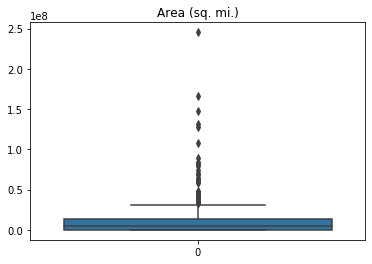

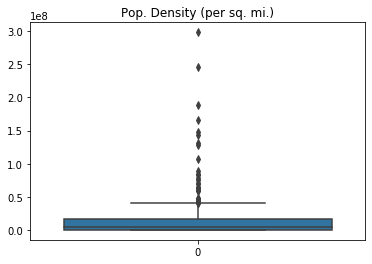

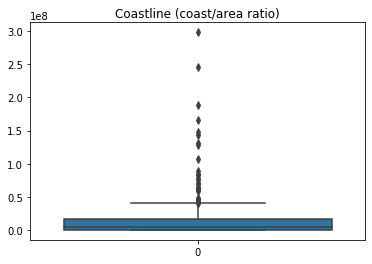

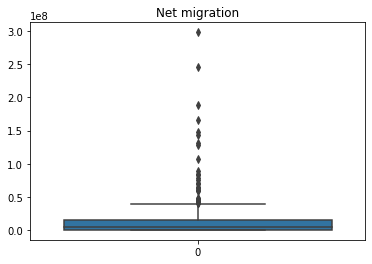

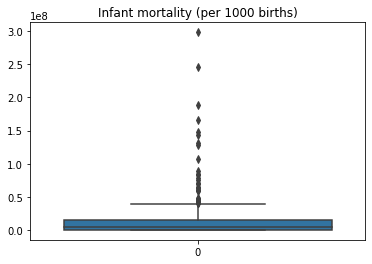

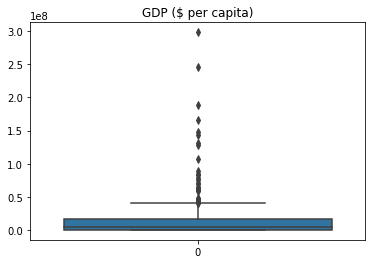

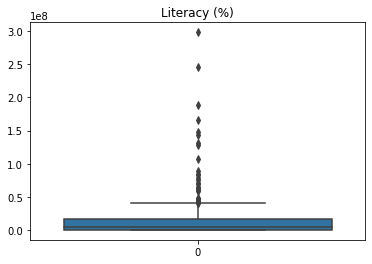

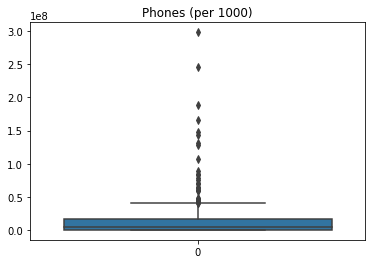

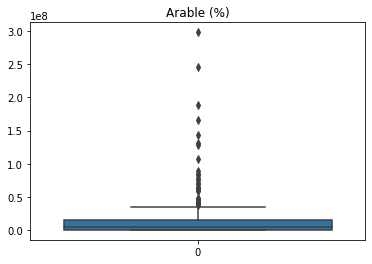

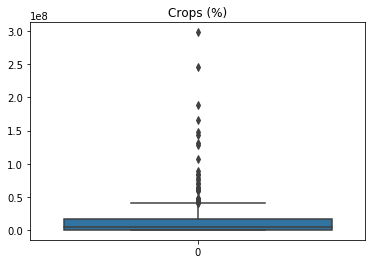

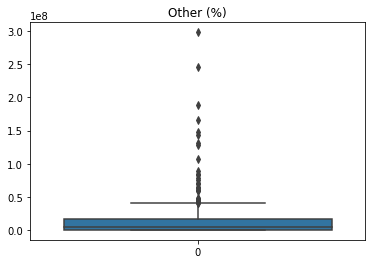

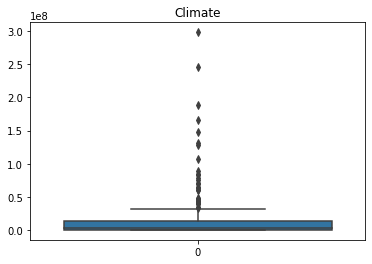

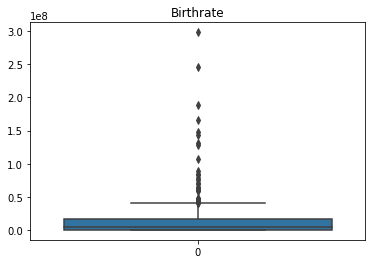

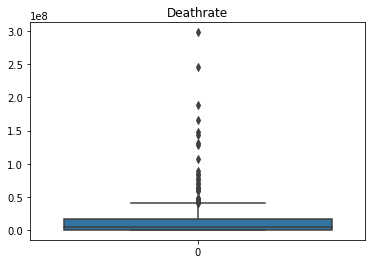

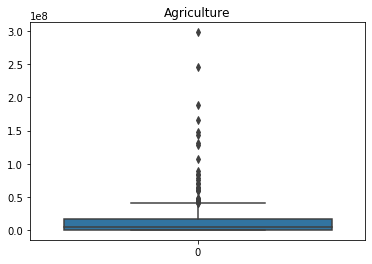

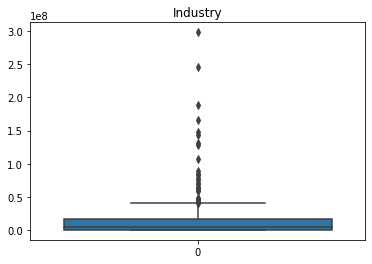

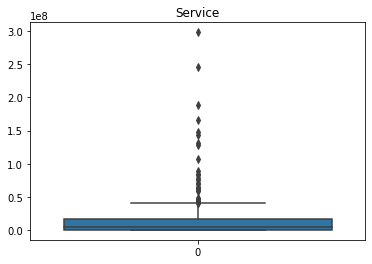

In [92]:
for i in quantitative.columns.to_list() :
    sns.boxplot(data=quantitative[i])
    plt.title(i)
    plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

## **Encoding**

In [ ]:
# df_OHE = pd.get_dummies(df_copy, columns=qualitative.columns.to_list(), drop_first=True)

In [95]:
from sklearn import preprocessing

In [104]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

df_copy[qualitative.columns.to_list()] = ordinal_encoder.fit_transform(df_copy[qualitative.columns.to_list()])

df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.0,0.0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,1.0,3.0,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2.0,6.0,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,3.0,8.0,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,4.0,10.0,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222.0,5.0,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,223.0,6.0,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,224.0,5.0,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,225.0,9.0,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


In [105]:
# After ending all actions on quantitative so we need to replace it with quantitative columns in df_copy
df_copy[quantitative.columns.to_list()] = quantitative
# Final DataFrame
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0.0,0.0,31056997.0,31056997.0,31056997.0,31056997.0,3.812500e-02,3.550696e+01,3.105700e+07,3.105700e+07,3.105700e+07,31056997.0,31056997.0,31056997.0,31056997.0,3.105700e+07,3.105700e+07,3.105700e+07,3.105700e+07,3.105700e+07
1,1.0,3.0,3581655.0,3581655.0,3581655.0,3581655.0,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06,3581655.0,3581655.0,3581655.0,3581655.0,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06,3.581655e+06
2,2.0,6.0,32930091.0,32930091.0,32930091.0,32930091.0,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07,32930091.0,32930091.0,32930091.0,32930091.0,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07,3.293009e+07
3,3.0,8.0,57794.0,57794.0,57794.0,57794.0,3.812500e-02,5.779400e+04,5.779400e+04,5.779400e+04,5.779400e+04,57794.0,57794.0,57794.0,57794.0,5.779400e+04,5.779400e+04,1.508443e-01,2.827109e-01,5.652830e-01
4,4.0,10.0,71201.0,71201.0,71201.0,71201.0,7.120100e+04,7.120100e+04,7.120100e+04,7.120100e+04,7.120100e+04,71201.0,71201.0,71201.0,71201.0,7.120100e+04,7.120100e+04,1.508443e-01,2.827109e-01,5.652830e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222.0,5.0,2460492.0,2460492.0,2460492.0,2460492.0,2.460492e+06,2.460492e+06,2.460492e+06,8.283828e+01,2.460492e+06,2460492.0,2460492.0,2460492.0,2460492.0,2.460492e+06,2.460492e+06,2.460492e+06,2.460492e+06,2.460492e+06
223,223.0,6.0,273008.0,273008.0,273008.0,273008.0,3.812500e-02,3.550696e+01,9.689823e+03,8.283828e+01,2.360614e+02,273008.0,273008.0,273008.0,273008.0,2.211473e+01,9.241345e+00,1.508443e-01,2.827109e-01,2.730080e+05
224,224.0,5.0,21456188.0,21456188.0,21456188.0,21456188.0,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07,21456188.0,21456188.0,21456188.0,21456188.0,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07,2.145619e+07
225,225.0,9.0,11502010.0,11502010.0,11502010.0,11502010.0,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07,11502010.0,11502010.0,11502010.0,11502010.0,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07,1.150201e+07


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

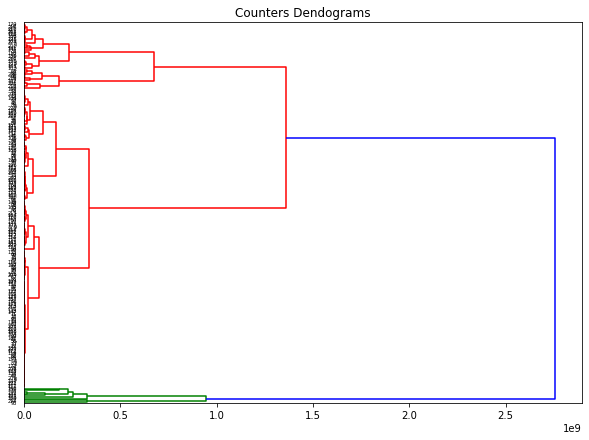

In [113]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))    
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy , method="ward",metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function
        
plt.show()        

In [139]:
#training
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters = 3, linkage='ward', affinity='euclidean')

clustering = agglom.fit_predict(df_copy)



In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_copy)

pca_df = pd.DataFrame(pca_data)
pca_df['clusters'] = clustering

pca_df

,0,1,clusters
0,4.075834e+07,-1.029040e+07,1
1,-6.029675e+07,2.625652e+06,2
2,6.366907e+07,-8.588511e+06,1
3,-7.523716e+07,3.963749e+06,2
4,-7.517630e+07,3.959456e+06,2
...,...,...,...
222,-6.562758e+07,2.967492e+06,2
223,-7.486361e+07,3.801487e+06,2
224,1.520408e+07,-4.204284e+06,1
225,-2.684170e+07,-4.007498e+05,2


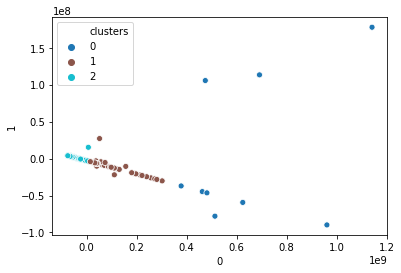

In [141]:
sns.scatterplot(x=pca_df.iloc[:,0],y=pca_df.iloc[:,1],hue=pca_df['clusters'],data=pca_df,palette='tab10');

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 